<center><span style="font-size: 36pt">INDENG 242A: Homework 1</span></center>
<center><span style="font-size: 24pt">Capucine Hustin</span></center>

<u><span style="font-size: 24pt">Question a</span></u>

In [274]:
# uploading the data
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
#open the first csv
data = pd.read_csv('Accord-242A-Spring24.csv')

In [275]:
train=data[data['Year']<=2018]
test=data[data['Year']>2018] #take the rest of the data as test

In [276]:
#Regression to find AcccordSales 
import statsmodels.api as sm

# Choose the features to be used
cols = ['Unemployment', 'AccordQueries', 'CPIEnergy', 'CPIAll','MilesTraveled']
X_train = train[cols]
y_train = train['AccordSales']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

In [277]:
# Fit the data to the model
print(type(X_train))
model1 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model1.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

VIF(X_train, cols)

<class 'pandas.core.frame.DataFrame'>
                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.683
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00612
Time:                        21:26:42   Log-Likelihood:                -595.60
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      54   BIC:                             1216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

Unemployment     31.683094
AccordQueries     1.939028
CPIEnergy        12.340357
CPIAll           45.304922
MilesTraveled    18.510210
dtype: float64

In [278]:
import matplotlib.pyplot as plt
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(8, 5))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22,
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)

    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)

    # Coefficients
    ax.scatter(x=np.arange(coef_df.shape[0]),
               marker='o', s=80,
               y=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)

    return plt.show()


<span style="font-size: 14pt">We have the 'Unemployment' variable that has a p-value of 0.697 which is by far the largest one. We can suppose that this variable is not really significative, and we'll see how the model goes without it. It also has a large VIF (>10) with CPIAll. Futhermore, when plotting the coefficients of features with 95% confidence intervals, only CPIEnergy and AccordQueries give an interval that reject the hypothesis that the coeficient is null.</span>

In [279]:
# Choose the features to be used
cols = ['AccordQueries', 'CPIEnergy', 'CPIAll','MilesTraveled']
X_train_a = train[cols]
y_train_a = y_train
X_train_a = sm.add_constant(X_train_a)

In [280]:
# Fit the data to the model
model1_a = sm.OLS(y_train_a, X_train_a).fit() #ordinary least square
print(model1_a.summary())
VIF(X_train_a, cols)

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.636
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00269
Time:                        21:26:42   Log-Likelihood:                -595.69
No. Observations:                  60   AIC:                             1201.
Df Residuals:                      55   BIC:                             1212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.171e+05    3.8e+04      3.084

AccordQueries     1.918686
CPIEnergy         4.634036
CPIAll           14.065391
MilesTraveled    17.765021
dtype: float64

<span style="font-size: 14pt">The new model has a similar R² so we didn't lose fitting the training set. 
The feature MilesTraveled has a large p-value and a large VIF in this new model. His interval is also nearly 0, so we can assume that the coefficient (close to zero compared to the other ones) is null. Let's check the new model without MilesTraveled</span>

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.475
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00227
Time:                        21:26:42   Log-Likelihood:                -596.69
No. Observations:                  60   AIC:                             1201.
Df Residuals:                      56   BIC:                             1210.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.419e+05   3.36e+04      4.224

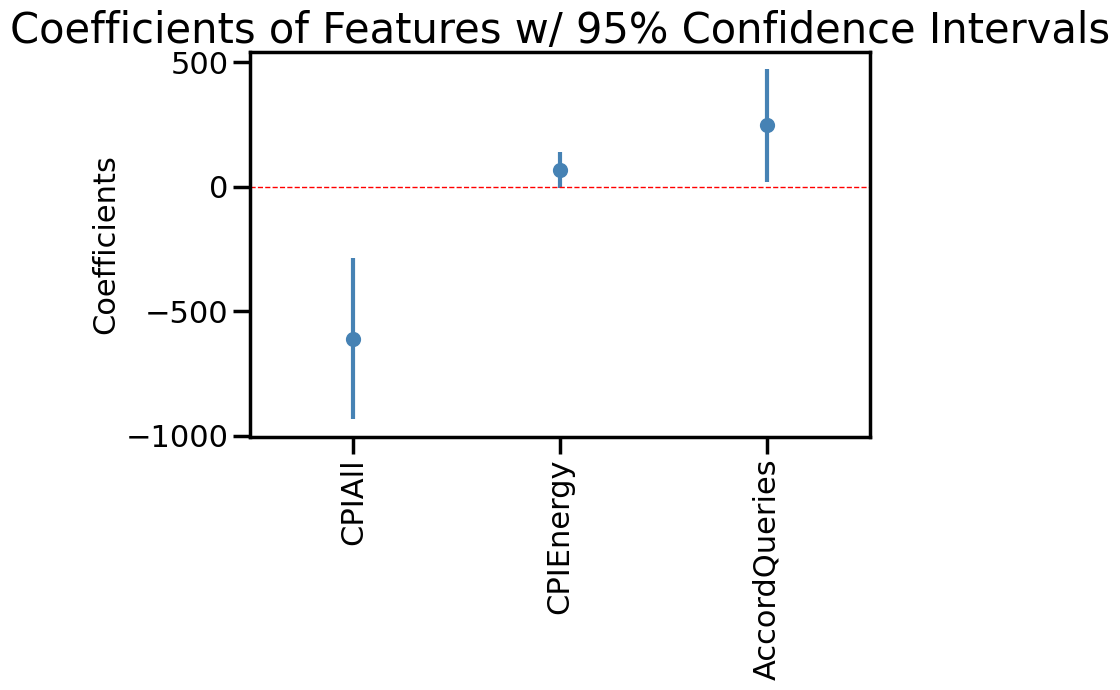

In [281]:
# Choose the features to be used
cols = ['AccordQueries', 'CPIEnergy','CPIAll']
X_train_a_2 = X_train[cols]
y_train_a_2= y_train
X_train_a_2 = sm.add_constant(X_train_a_2)
# Fit the data to the model
model1_a_2 = sm.OLS(y_train_a_2, X_train_a_2).fit() #ordinary least square
print(model1_a_2.summary())
print(VIF(X_train_a_2,cols))
coefplot(model1_a_2)

<span style="font-size: 14pt">All the p-values are quite small, all the VIF as well and every confident interval doesn't have 0 in it, so the coefficients are meaningfull to the model.
R² isn't really good but is similar to the one with the 5 variables so those 3 variables seems enough, we don't need the other ones. 
The adjusted R square is 0.195 (previously 0.185) so it increased a little bit, which is a good sign. (The AIC and BIC also both decreased a tiny bit, which is a good sign as well.)
P(F-statistic) is 0.00227 (and in the previous models it was also really low) so the entire model is significant. 
In conclusion CPIAll, CPIEnergy and AccordQueries help to predict AccordSales.  </span>


<span style="font-size: 14pt">The final equation would be: 
Accord sales= 1.419e+05 + 245.2054xAccordQueries + 67.0291xCPIEnergy -610.9156xCPIAll. </span>

<span style="font-size: 14pt">All the coefficient are quite the same oder of size, which means that they are more or less as important in the model (the value of the 3 variables are also in the same size order). 
It seems logical that the coefficient for the AccordQueries because the more people Google search "Honda Accord", the more people are interested in buying a Honda Acoord and the more people are finally buying one.
It is also logical that if the CPIAll is high the Honda sales will drop, as people will have less money to spend.
The sign of the coefficient for CPIEnergy is a little bit more suprising. However, it is interesting to notice that this coefficient is closer to zero and in the confident interval can be negative (-4). Thus, this variable is a little bit more tricky. We can believe that the Honda car are more fuel efficient and this might be the reason why when fuels get more expensive people prefer to buy a Honda rather than a big SUV. </span>

<u><span style="font-size: 24pt">Question b</span></u>

In [282]:
import statsmodels.formula.api as smf

modelb = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIEnergy + CPIAll + MilesTraveled + MonthFactor',
                 data=train).fit()
print(modelb.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7.982
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.66e-08
Time:                        21:26:43   Log-Likelihood:                -563.04
No. Observations:                  60   AIC:                             1160.
Df Residuals:                      43   BIC:                             1196.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<span style="font-size: 14pt">The new regression equation is:</span>

$$
\text{Accord sales} = 9.775 \times 10^4 + 10.6620 \times \text{AccordQueries} + 67.5163 \times \text{CPIEnergy} -639.8070 \times \text{CPIAll} - 8189.7564 \times \mathbb{1}_{\text{January}} - 4825.4928 \times \mathbb{1}_{\text{February}} + 430.1538 \times \mathbb{1}_{\text{March}} + 5573.2245 \times \mathbb{1}_{\text{May}} + 1536.5375 \times \mathbb{1}_{\text{June}} + 3894.8622 \times \mathbb{1}_{\text{July}} + 8697.6749 \times \mathbb{1}_{\text{August}} + 3046.1712 \times \mathbb{1}_{\text{September}} - 25.6309 \times \mathbb{1}_{\text{October}} - 1493.6532 \times \mathbb{1}_{\text{November}} + 3256.3031 \times \mathbb{1}_{\text{December}}
$$


<span style="font-size: 14pt">We should interpret the dummy variables as by how much the month (of the dummy variable) increases the sales compared to the month of April (that will be counted in the intercept). 
Here the sales seem to happen more during spring/summer (March to September), probably because people go more on holiday during those months and might need a car to travel.
There is also a boost of sales in December, probably because people get their bonuses at the end of the year and have more money to spend, or can buy gift for Christmas.
For October, November, January and February, there is a drop of sales (negative coefficient). This is probably because people travel less during those months. </span>

<span style="font-size: 14pt">R² is now 0.748 which is a huge improvement. The seasonility changed a lot the model, and this R² has a more acceptable value. The adjusted R squared is also higher which is good news. However we added lots of dummy variables which might lead to overfitting. </span>

<span style="font-size: 14pt">The new significant variable, according to the p-value, are the months of August, February (May and February). </span>

<span style="font-size: 14pt">We could have added the MonthNumeric to model the seasonality but this model would be less interesting as instead of having 11 variables, you only have 1 (MonthFactor), so you have less flexibility. Also, this variable gives more weight to the sales of the last months (November-December) and less weight to the first ones, which doesn't make lots of sense.</span>

<span style="font-size: 14pt">Maybe we could have added different way of seasoning with for example Spring/Summer and Autumn/Winter as the trend seems to go that way (high sales for the Spring/Summer and lower sales for Autumn/winter). This new way would be less good on the training set, as we have less flexibility. Also December is an exception for the Autumn/Winter decrease in sales so it might ruin the model grouping the whole Autumn/Winter months. However, this will add only one variable which will lead to less overfitting (we'll see in question c that the model might be overfitting) </span>

<u><span style="font-size: 24pt">Question c</span></u>

<span style="font-size: 14pt">I chose the variables: CPIEnergy, CPIAll and MonthFactor. 
I first tried the AccordQueries, CPIEnergy, CPIAll and MonthFactor combo because in the model seen in question a, the three first were significant and we've seen that the MonthFactor increased a lot the R² at the question b. When plotting the model summary AccordQueries wasn't anymore significant, with a high p-value, so I took it off. I also compared the R² and OSR² of CPIEnergy, CPIAll and MonthFactor against AccordQueries, CPIEnergy, CPIAll and MonthFactor. And the first one was better so I kept it.
</span>

In [283]:
modelc = smf.ols(formula='AccordSales ~ CPIEnergy + CPIAll + MonthFactor',
                 data=train).fit()
print(modelc.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     10.28
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.16e-09
Time:                        21:26:43   Log-Likelihood:                -563.54
No. Observations:                  60   AIC:                             1155.
Df Residuals:                      46   BIC:                             1184.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [284]:
def OSR2(model, df_train, df_test, dependent_var):
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)

    return 1 - SSE/SST

In [285]:
OSR2(modelc, train, test, 'AccordSales')

0.5850733196289606

<span style="font-size: 14pt">The OSR² is 0.585 on the testing set and the R² is 0.744 on the training set. This difference shows that the model is probably too complex and overfit the training data. This is probably due to the MonthFactor that adds 11 variables which might lead to an overfitting. 
The model is thus great for the training set (has a good R²) but might not be generalized well for new data. 
This difference could possibly be caused by the small number of observation that we have in the training data set. The number of variable (13) is probably too much compared to the number of training data set (82 rows).</span>

<u><span style="font-size: 24pt">Question d</span></u>

<span style="font-size: 14pt">I chose to use the number of Ford car sold per month in the US, as it should be quite corrolated with the ones of Honda, and give the trend of the motor car market.
I found the data at this address:
https://www.goodcarbadcar.net/ford-us-sales-figures/
</span>

In [286]:
data_ford = pd.read_csv('ford.csv')

In [287]:
merged = pd.concat([data, data_ford], axis=1)
merged

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Ford,...,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,146319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,175335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,March,2014,33962,6.7,79,236.028,249.961,251120,232506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,April,2014,34124,6.2,74,236.468,249.864,251959,200897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,May,2014,39637,6.3,75,236.918,249.213,252289,240729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,7,July,2023,17873,3.5,90,304.348,274.353,270204,165974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,8,August,2023,17661,3.8,86,306.269,289.671,270964,153610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,9,September,2023,16823,3.8,82,307.481,294.087,270182,157141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,10,October,2023,15346,3.8,79,307.619,286.877,269669,141886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
train_merged=merged[merged['Year']<=2018]
test_merged=merged[merged['Year']>2018] #take the rest of the data as test

In [289]:
modeld = smf.ols(formula='AccordSales ~ CPIEnergy + CPIAll + MonthFactor + Ford',
                 data=train_merged).fit()
print(modeld.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     11.59
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.26e-10
Time:                        21:26:43   Log-Likelihood:                -558.60
No. Observations:                  60   AIC:                             1147.
Df Residuals:                      45   BIC:                             1179.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [290]:
OSR2(modeld,train_merged,test_merged,'AccordSales')

0.4292256735065607

<span style="font-size: 14pt">The R² improved. 
The p-value of the variable "Ford" is 0.008 which shows that this new variable has probably improved the model.
However the OSR² is still low, even worth, so we migh be still overfitting. Maybe with MonthFactor dummy variable it would work better.
Because the OSR² is not really good, it is hard to say that this new model added any <i>predictive</i> value. </span>